## The Influence of Caregorial Variables on Dependent Variables

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann, lecture 368-369, __[Creating and working with Dummy Variables](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/learn/lecture/17574312#overview)__.)*

In most cases, also __categorical variables__ significantly influence and explain the dependent variable.

A categorical variable is a variable with a limited number of possible values which are typically non-numerical. For instance, the gender of a person is a categorical variable.

For our example of the movies database we can take the original language of a movie where we have the values English, French, German and many more. In order to use these categorical variables in our regression model we have to __convert them to dummy variables__.

*Dummy variables can take two values, one and zero or true and false.*

Our goal here is to identify categorical data that could influence a movie's revenue and convert these categorical variables to dummy variables. 

*We will run the regression model with these dummy variables to find out, if we can further improve our model.*

### Creating and working with Dummy Variables (Part 1)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
movie = pd.read_csv("../assets/data/movies_metadata.csv", low_memory= False)

In [33]:
# setting the index like before
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [34]:
# sorting the index
movie.sort_index(inplace = True)

In [35]:
# removing rows with NaT in the index
movie = movie[~movie.index.isna()]
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-04,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mobile Homes,False,0.0,1.0
2018-04-25,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Mary Shelley,False,0.0,1.0
2018-11-07,False,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,Bad Boys for Life,False,0.0,12.0


In [36]:
# selecting the time period and certain variables
df = movie.loc["2010":"2016", ["title", "budget", "revenue", "vote_average", "popularity",
                              "belongs_to_collection", "original_language"]].copy()

In [37]:
df.budget = pd.to_numeric(df.budget, errors = "coerce").astype(float)

In [38]:
df.popularity = pd.to_numeric(df.popularity, errors = "coerce")

In [39]:
df = df[(df.revenue > 0) & (df.budget > 0)]

In [40]:
df.loc[:, ["budget", "revenue"]] = df.loc[:, ["budget", "revenue"]] / 1000000

In [41]:
df.sort_values("revenue", ascending = False) # sorting from high to low revenue

,title,budget,revenue,vote_average,popularity,belongs_to_collection,original_language
release_date,,,,,,,
2015-12-15,Star Wars: The Force Awakens,245.000000,2068.223624,7.5,31.626013,"{'id': 10, 'name': 'Star Wars Collection', 'po...",en
2012-04-25,The Avengers,220.000000,1519.557910,7.4,89.887648,"{'id': 86311, 'name': 'The Avengers Collection...",en
2015-06-09,Jurassic World,150.000000,1513.528810,6.5,32.790475,"{'id': 328, 'name': 'Jurassic Park Collection'...",en
2015-04-01,Furious 7,190.000000,1506.249360,7.3,27.275687,"{'id': 9485, 'name': 'The Fast and the Furious...",en
2015-04-22,Avengers: Age of Ultron,280.000000,1405.403694,7.3,37.379420,"{'id': 86311, 'name': 'The Avengers Collection...",en
...,...,...,...,...,...,...,...
2011-08-31,Bodyguard,0.000130,0.000008,5.2,2.402032,NaN,hi
2014-08-29,Raja Natwarlal,0.000005,0.000004,5.5,1.109545,NaN,hi
2014-06-05,All at Once,0.750000,0.000003,6.0,0.201582,NaN,ru


- We can see that the five movies with the highest revenues belong to a franchise or to a collection.

- Movie franchises are considered to be cash cows with almost guaranteed success when producing and adding another movie to the franchise.

- For our purposes, we are only interested whether a movie belongs to a collection or not. Therefore we will transform the *belongs_to_collection* column to true and false values

In [42]:
df.belongs_to_collection.notnull() # does belongs_to_collection have value?

release_date
2010-01-01    False
2010-01-08    False
2010-01-12    False
2010-01-13    False
2010-01-14     True
              ...  
2016-12-23     True
2016-12-23    False
2016-12-23    False
2016-12-25    False
2016-12-25    False
Name: belongs_to_collection, Length: 1569, dtype: bool

In [43]:
df.belongs_to_collection = df.belongs_to_collection.notnull() # overwriting column, converting to boolean

In [44]:
df.set_index("title", inplace = True) # setting title as index

In [45]:
df # belongs_to_collection is now a dummy variable

,budget,revenue,vote_average,popularity,belongs_to_collection,original_language
title,,,,,,
Ca$h,7.0,0.046488,6.0,9.107829,False,en
Leap Year,19.0,29.922472,6.5,7.432311,False,en
Morning Glory,40.0,58.785180,6.1,10.771255,False,en
Devil,10.0,33.583175,5.8,7.094276,False,en
Tooth Fairy,48.0,112.462508,5.2,6.744680,True,en
...,...,...,...,...,...,...
Resident Evil: The Final Chapter,40.0,312.242626,5.9,0.755710,True,en
Railroad Tigers,50.0,102.205175,6.2,3.798504,False,zh
Dangal,10.4,310.000000,8.0,8.792104,False,hi


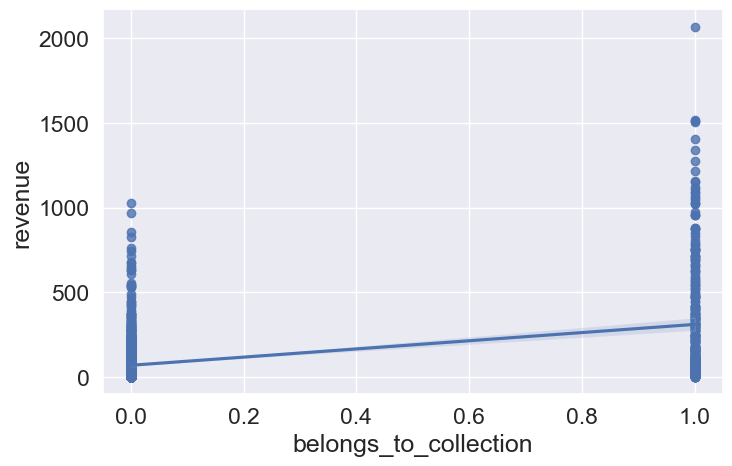

In [46]:
# visualizing relationship between independent var belongs_to_collection and dependent var revenue
plt.figure(figsize = (8, 5))
sns.set(font_scale=1.5)
# with seaborn regression plot
sns.regplot(x = "belongs_to_collection", y = "revenue", data = df)
plt.show()

- On the x axis we have the variable belongs_to_collection (values are zero for false and one for true only)

- On the y axis we have the revenue

- We can see that there seems to be a **significant positive relationship**, which means if a movie is part of a collection of franchise then we would expect a higher revenue.

In [47]:
from statsmodels.formula.api import ols

In [51]:
# first our already wellknown regression model once again
model = ols("revenue ~ budget + popularity + vote_average", data = df)

In [52]:
results = model.fit()

In [53]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:06:44   Log-Likelihood:                -9703.3
No. Observations:                1569   AIC:                         1.941e+04
Df Residuals:                    1565   BIC:                         1.944e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -209.6573     21.879     -9.583   

In [54]:
# now we include the categorial variable belongs_to_collection in the model
model = ols("revenue ~ budget + popularity + vote_average + belongs_to_collection", data = df)

In [55]:
results = model.fit()

In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     980.8
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:07:12   Log-Likelihood:                -9623.0
No. Observations:                1569   AIC:                         1.926e+04
Df Residuals:                    1564   BIC:                         1.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

- The summary table shows us that we could increase R-squared and also adjusted R-squared to 71.5% or 71.4%.

- For belongs_to_collection we have a positive coefficient of 99.44

- The intuition behind this is that if a movie belongs to a franchise or a collection, we can expect a almost $99.4 million higher revenue

- The t-statistics for belongs_to_collection is 12.9 and we have a very low p-value, therefore we can conclude that the ***dummy variable belongs_to_collection is highly significant***


- Another thing to point outs is that by adding the additional variable belongs_to_collection the slope coefficient for the budget variable changed:
  - before adding belongs_to_collection the slope coefficient for budget was 3.0737 
  - now, after adding belongs_to_collection, we have a the slope coefficient for budget of only 2.8009